In [1]:
def load_annotations(anno_path):
        with open(anno_path, 'r') as f:
            lines = f.readlines()
        return lines

In [5]:
lines = load_annotations('data/exdark_train.txt')

In [20]:
bbox_list = lines[1].split(' ')[1:]
bbox_list

['174,64,329,284,7', '411,55,557,304,7', '4,144,141,433,7\n']

In [1]:
import torch
# check gpu name by torch
for i in range(4):
    print(torch.cuda.get_device_name(i))
# torch.cuda.get_device_name(0)


/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NVIDIA GeForce RTX 3090
NVIDIA GeForce RTX 3090
NVIDIA GeForce RTX 3090
NVIDIA GeForce RTX 3090


In [1]:
# check cpu name by os info
import os


In [2]:
! chmod 600 /home/ubuntu/.kaggle/kaggle.json

In [3]:
!kaggle datasets download aladdinpersson/pascalvoc-yolo

100%|██████████████████████████████████████| 4.31G/4.31G [34:25<00:00, 2.20MB/s]
100%|██████████████████████████████████████| 4.31G/4.31G [34:25<00:00, 2.24MB/s]


In [ ]:
!unzip pascalvoc-yolo.zip -d /home/ubuntu/thanh.nt176874/dangnh/Object-Detection/yolov1/data/

In [2]:
!nvidia-smi

Failed to initialize NVML: Unknown Error


In [6]:
!python train.py

Traceback (most recent call last):
  File "/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/train.py", line 2, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'


In [3]:
cd vision

/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/vision


In [5]:
!cp references/detection/utils.py ../
!cp references/detection/transforms.py ../
!cp references/detection/coco_eval.py ../
!cp references/detection/engine.py ../
!cp references/detection/coco_utils.py ../

In [1]:
!nvidia-smi

Mon Jul 11 13:44:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:88:00.0 Off |                  N/A |
| 45%   50C    P2   117W / 350W |  20510MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:89:00.0 Off |                  N/A |
| 51%   

In [2]:

import pandas as pd
import numpy as np
import yaml
import torch
from tqdm.notebook import tqdm
from models import FasterRCNN
from metrics import calculate_image_precision
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torchvision
import matplotlib.pyplot as plt
import os

#set enviroment
CUDA_LAUNCH_BLOCKING=1

device = torch.device("cuda:3"
                      if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
model = FasterRCNN(num_classes=13).to(device)
model.load_state_dict(torch.load("checkpoints/FasterRCNN_ResNet50_FPN_lr_1e3.pth"))
model.eval()
transform = A.Compose([
    ToTensorV2(p=1.0)
])
img = cv2.imread('Dataset/2015_06963.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
img /= 255.0
img = transform(image=img)['image']

In [3]:
gts = [[551, 239, 631, 380],
       [4, 304, 305, 476],
       [31, 270, 183, 467],
       [548, 265, 640, 388],
       [244, 265, 449, 429],
       [114, 305, 305, 477],
       [264, 227, 338, 408],
       [313, 237, 433, 433]
       ]

In [4]:
predict = model(img.unsqueeze(0).to(device))
predict

/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180487213/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[{'boxes': tensor([[  5.2113, 298.4190, 276.4568, 478.1106],
          [254.3738, 251.0171, 385.8314, 449.3320],
          [111.7394, 300.2773, 288.1396, 478.8068],
          [325.8362, 228.7815, 432.8363, 437.8531],
          [265.2957, 204.8316, 449.6431, 438.6673],
          [114.1550, 233.7356, 428.7205, 440.7674],
          [ 30.9352, 270.2312, 121.3540, 338.3838],
          [546.2443, 251.9626, 636.2759, 378.0562],
          [534.9787, 238.0105, 618.9673, 368.8419],
          [ 20.1890, 272.6843, 129.5259, 408.4527],
          [286.1908, 140.0102, 419.8347, 189.5894],
          [199.4838, 269.3742, 334.8747, 446.2173],
          [363.8844, 191.3510, 391.1391, 219.3565],
          [196.3689, 279.2330, 311.1872, 443.5246],
          [112.1354, 235.4514, 434.6539, 309.5714],
          [ 23.0700, 283.3885, 318.1771, 410.6903],
          [ 38.4984, 267.3638, 138.8615, 323.9772],
          [540.8732, 232.8246, 622.2465, 380.6567],
          [311.5735, 272.6202, 429.1194, 444.5452],
   

In [5]:
boxes = predict[0]['boxes'].cpu().detach().numpy()

In [6]:
calculate_image_precision(gts, boxes)

best pred_idx is 0
best pred_idx is 1
best pred_idx is 2
best pred_idx is 3
best pred_idx is 7
best pred_idx is 17
best pred_idx is 23
best pred_idx is 28


AttributeError: 'list' object has no attribute 'sum'

labels: [11, 11, 6, 6, 11, 10, 6, 6]
bounding box is: [  5 298 276 478]
bounding box is: [254 251 385 449]
bounding box is: [111 300 288 478]
bounding box is: [325 228 432 437]
bounding box is: [546 251 636 378]
bounding box is: [540 232 622 380]
bounding box is: [264 249 345 428]
bounding box is: [ 29 268 178 458]


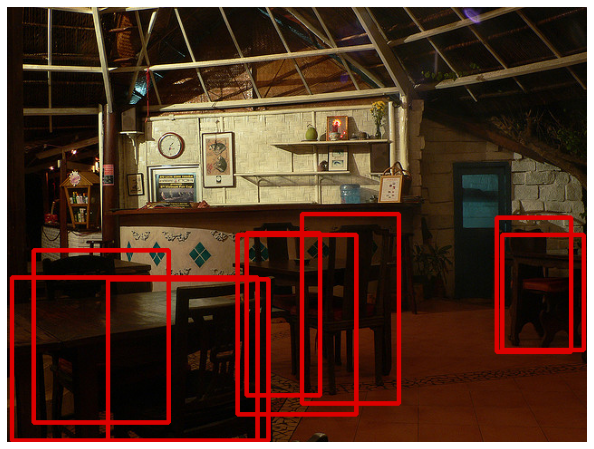

In [11]:
boxes = predict[0]['boxes'].cpu().detach().numpy().astype(np.int32)
boxss = [boxes[0], boxes[1], boxes[2], boxes[3], boxes[7],  boxes[17], boxes[23], boxes[28]]
labels = predict[0]['labels'].cpu().detach().numpy()
label_match = [labels[0], labels[1], labels[2], labels[3], labels[7], labels[17],  labels[23], labels[28]]
print(f"labels: {label_match}")
# sample = imgs[4].permute(1, 2, 0).cpu().numpy()
# print(f"image path is {img_paths[id]}")
test = cv2.imread('Dataset/2015_06963.jpg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
# test = transform(image=test)['image']
# test = test.permute(1,2,0).cpu().numpy()
# print(f"shape of test is {test.shape}")
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxss:   
#     # print(f"box is {box} and type is {type(box[0])}") 
    cv2.rectangle(test,
                (box[0], box[1]),
                (box[2], box[3]),
                (220, 0, 0), 3)
    print(f"bounding box is: {box}")

ax.set_axis_off()
ax.imshow(test)


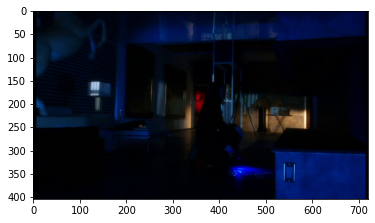

In [34]:
import numpy as np
import pandas as pd
# import cv as cv 
import cv2
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

nat = cv2.imread('/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/Dataset/2015_07338.png')
nat_2 = cv2.cvtColor(nat, cv2.COLOR_BGR2RGB)
plt.imshow(nat_2)

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)




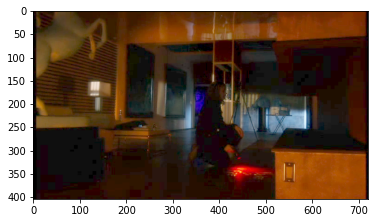

In [37]:
gamma = 2.0     # change the value here to get different result
adjusted = gammaCorrection(nat_2, gamma=gamma)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))

In [2]:
!nvidia-smi

Mon Jul 11 11:43:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:88:00.0 Off |                  N/A |
| 52%   50C    P2   135W / 350W |  20510MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:89:00.0 Off |                  N/A |
| 55%   

In [1]:
cd /home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/Low-light-Image-Enhancement

/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/Low-light-Image-Enhancement


In [ ]:
!python3 demo.py -f /home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/Dataset/ -l 0.15 -g 0.6

In [2]:
import os
len(os.listdir('/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/data/data_preprocessed/enhanced'))

4147

In [3]:
cd /home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/archives/Zero-DCE/code

/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/archives/Zero-DCE/code


In [7]:
!python3 demo.py --testDir=/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/archives/Zero-DCE/test \
               --ckpt=/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/archives/Zero-DCE/train-jobs/ckpt/8LE-color-loss2_best_model.pth \
               --outDir=/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/archives/Zero-DCE/test/demo_output

>>>> Torch device is 1
100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 10.71it/s]


In [1]:
cd /home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/data/data_enhancement


/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/data/data_enhancement


In [ ]:
import os
for file in os.listdir('/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/data/data_enhancement'):
    if not os.path.isdir('/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/data/data_enhancement/' + file):
        os.remove('/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/data/data_enhancement/' + file)

In [20]:
!python3 test_enhancement.py --input_dir=/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/Dataset \
                             --result_dir=/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/data/data_enhancement/MIRNet/ \
                             --weights=pretrained_models/enhancement/model_lol.pth --save_images

[INFO] Torch device is 3
>>>> There are 7363 images in the input directory
Traceback (most recent call last):
  File "/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/archives/MIRNet/test_enhancement.py", line 56, in <module>
    model_restoration.load_state_dict(torch.load(args.weights)['state_dict'])
  File "/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/torch/serialization.py", line 608, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/torch/serialization.py", line 787, in _legacy_load
    result = unpickler.load()
  File "/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/torch/serialization.py", line 743, in persistent_load
    deserialized_objects[root_key] = restore_location(obj, location)
  File "/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/torch/serializat

In [12]:
import torch

/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
x = torch.randn(2,3)
x

tensor([[0.5570, 0.1454, 0.5628],
        [0.0510, 2.1752, 1.3139]])

In [8]:
import skimage.io as io
import matplotlib.pyplot as plt
import cv2
import torch

/home/ubuntu/thanh.nt176874/dangnh/env/dangnh/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(500, 500)
(224, 224)


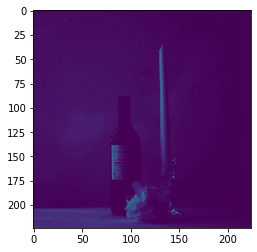

In [23]:
data = io.imread('/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/Dataset/2015_01701.JPEG')
# data = data[:, : , 0:3]
print(data.shape)

data = cv2.resize(data, (224, 224))
# print(torch.from_numpy(data).float().permute(2,0,1).shape)
# data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
print(data.shape)

plt.imshow(data)


In [3]:
!python3 test.py configs/yolov3/yolov3_zero_dce++.py  experiments/yolov3_zero_dce++/epoch_42.pth --eval mAP --show-dir data/test

/home/ubuntu/thanh.nt176874/dangnh/Object-Detection-In-Night-Vision/mmdet/models/builder.py:51: UserWarning: train_cfg and test_cfg is deprecated, please specify them in model
  warnings.warn(
load checkpoint from local path: experiments/yolov3_zero_dce++/epoch_42.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1467/1467, 3.8 task/s, elapsed: 383s, ETA:     0s
+-----------+------+------+--------+-------+
| class     | gts  | dets | recall | ap    |
+-----------+------+------+--------+-------+
| Bicycle   | 212  | 684  | 0.892  | 0.816 |
| Boat      | 289  | 858  | 0.889  | 0.785 |
| Bottle    | 282  | 984  | 0.883  | 0.785 |
| Bus       | 135  | 352  | 0.948  | 0.917 |
| Car       | 597  | 1512 | 0.930  | 0.851 |
| Cat       | 183  | 464  | 0.874  | 0.730 |
| Chair     | 466  | 1797 | 0.824  | 0.696 |
| Cup       | 366  | 904  | 0.858  | 0.770 |
| Dog       | 207  | 556  | 0.908  | 0.795 |
| Motorbike | 233  | 808  | 0.880  | 0.787 |
| People    | 1562 | 4044 | 0.898  | 0.806 |
| Table     | 333  | 